HEART DISEASE PREDICTION - DATA ANALYSIS

📊 DATASET OVERVIEW
------------------------------------------------------------
Total Records: 1025
Total Features: 14

Column Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Data Types:
age           int64
sex           int64
cp            

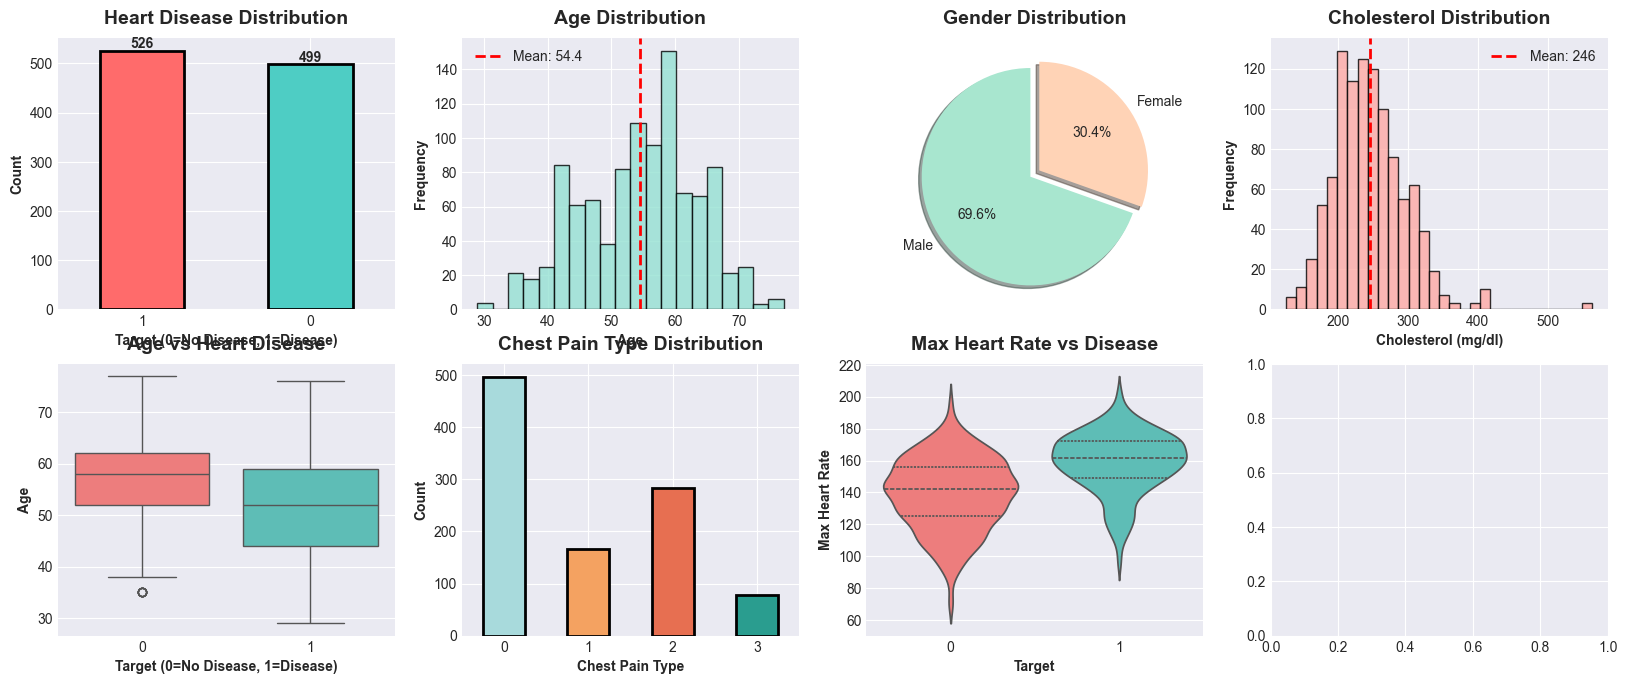

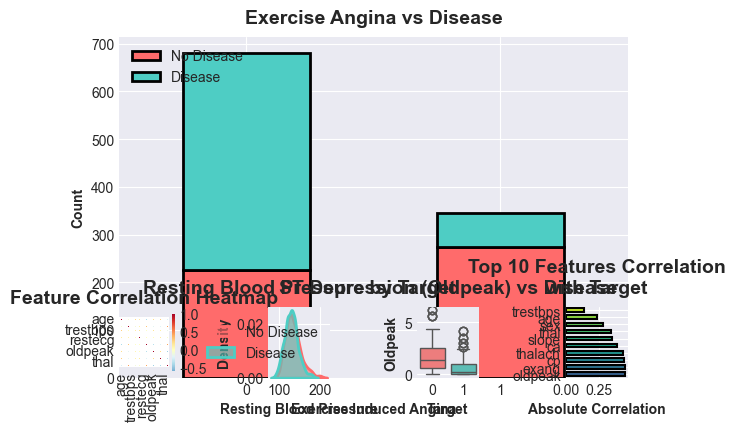


🤖 BUILDING PREDICTION MODEL
------------------------------------------------------------
Training set size: 820
Test set size: 205

🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 80.98%

🔹 Training Random Forest...
✅ Random Forest Accuracy: 100.00%
✅ Model evaluation saved as 'heart_disease_model_evaluation.png'


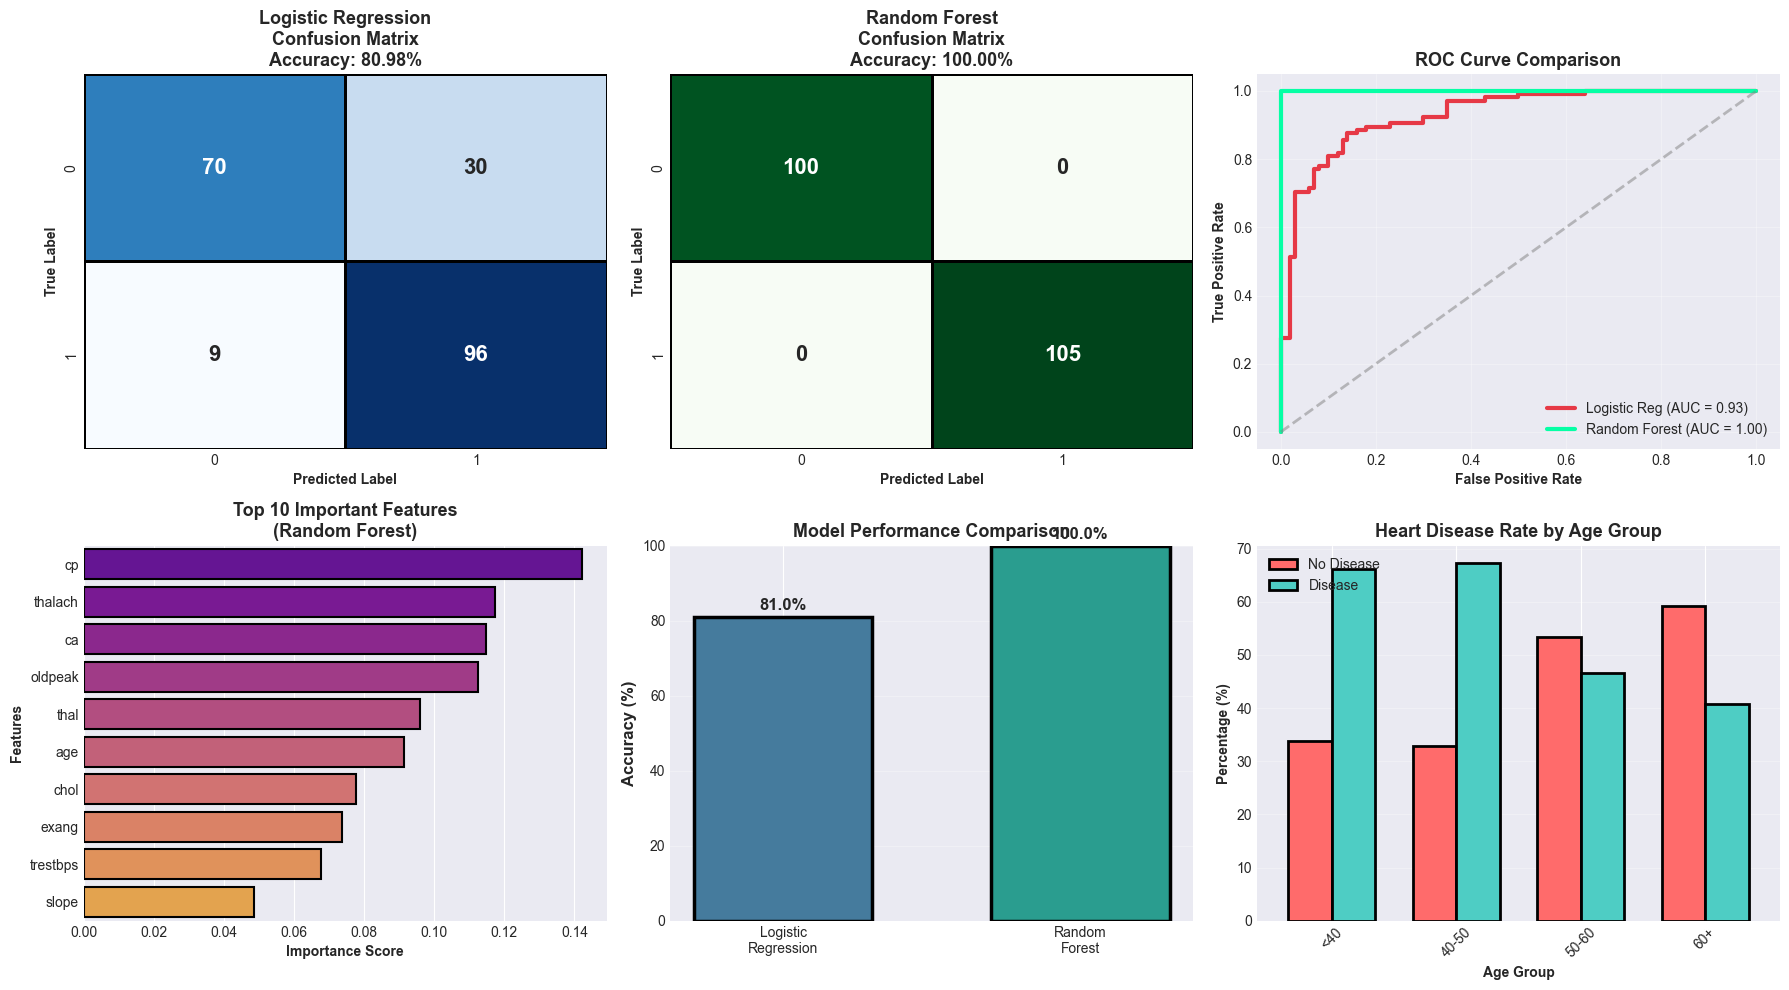


📋 LOGISTIC REGRESSION CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

  No Disease       0.89      0.70      0.78       100
     Disease       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


📋 RANDOM FOREST CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       100
     Disease       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


🔍 TOP 10 FEATURES CORRELATED WITH HEART DISEASE
------------------------------------------------------------


ValueError: could not convert string to float: '50-60'

In [1]:
# heart_disease_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data from your file
df = pd.read_csv('heart.csv')  # YOUR FILE NAME

print("="*60)
print("HEART DISEASE PREDICTION - DATA ANALYSIS")
print("="*60)

# 1. Basic Info
print("\n📊 DATASET OVERVIEW")
print("-" * 60)
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

# 2. Statistical Summary
print("\n📈 STATISTICAL SUMMARY")
print("-" * 60)
print(df.describe())

# 3. Target Distribution
print("\n🎯 TARGET DISTRIBUTION")
print("-" * 60)
target_counts = df['target'].value_counts()
print(f"No Heart Disease (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Heart Disease (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

# Create visualizations
fig = plt.figure(figsize=(20, 12))

# Plot 1: Target Distribution
ax1 = plt.subplot(3, 4, 1)
colors = ['#ff6b6b', '#4ecdc4']
target_counts.plot(kind='bar', color=colors, ax=ax1, edgecolor='black', linewidth=2)
plt.title('Heart Disease Distribution', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Target (0=No Disease, 1=Disease)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)
for i, v in enumerate(target_counts):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Plot 2: Age Distribution
ax2 = plt.subplot(3, 4, 2)
plt.hist(df['age'], bins=20, color='#95e1d3', edgecolor='black', alpha=0.8)
plt.title('Age Distribution', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
plt.legend()

# Plot 3: Gender Distribution
ax3 = plt.subplot(3, 4, 3)
gender_counts = df['sex'].value_counts()
colors_pie = ['#a8e6cf', '#ffd3b6']
explode = (0.05, 0.05)
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', 
        colors=colors_pie, startangle=90, explode=explode, shadow=True)
plt.title('Gender Distribution', fontsize=14, fontweight='bold', pad=10)

# Plot 4: Cholesterol Distribution
ax4 = plt.subplot(3, 4, 4)
plt.hist(df['chol'], bins=30, color='#ffaaa5', edgecolor='black', alpha=0.8)
plt.title('Cholesterol Distribution', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Cholesterol (mg/dl)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.axvline(df['chol'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["chol"].mean():.0f}')
plt.legend()

# Plot 5: Age vs Target
ax5 = plt.subplot(3, 4, 5)
sns.boxplot(x='target', y='age', data=df, palette=['#ff6b6b', '#4ecdc4'])
plt.title('Age vs Heart Disease', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Target (0=No Disease, 1=Disease)', fontweight='bold')
plt.ylabel('Age', fontweight='bold')

# Plot 6: Chest Pain Type
ax6 = plt.subplot(3, 4, 6)
cp_counts = df['cp'].value_counts().sort_index()
colors_cp = ['#a8dadc', '#f4a261', '#e76f51', '#2a9d8f']
cp_counts.plot(kind='bar', color=colors_cp, edgecolor='black', linewidth=2)
plt.title('Chest Pain Type Distribution', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Chest Pain Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)

# Plot 7: Max Heart Rate vs Target
ax7 = plt.subplot(3, 4, 7)
sns.violinplot(x='target', y='thalach', data=df, palette=['#ff6b6b', '#4ecdc4'], inner='quartile')
plt.title('Max Heart Rate vs Disease', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Target', fontweight='bold')
plt.ylabel('Max Heart Rate', fontweight='bold')

# Plot 8: Exercise Induced Angina
ax8 = plt.subplot(3, 4, 8)
exang_disease = pd.crosstab(df['exang'], df['target'])
exang_disease.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'], edgecolor='black', linewidth=2)
plt.title('Exercise Angina vs Disease', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Exercise Induced Angina', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(['No Disease', 'Disease'], loc='upper left')
plt.xticks(rotation=0)

# Plot 9: Correlation Heatmap
ax9 = plt.subplot(3, 4, 9)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=10)

# Plot 10: Blood Pressure Distribution
ax10 = plt.subplot(3, 4, 10)
sns.kdeplot(data=df[df['target']==0]['trestbps'], label='No Disease', 
            fill=True, color='#ff6b6b', alpha=0.6, linewidth=2)
sns.kdeplot(data=df[df['target']==1]['trestbps'], label='Disease', 
            fill=True, color='#4ecdc4', alpha=0.6, linewidth=2)
plt.title('Resting Blood Pressure by Target', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Resting Blood Pressure', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.legend()

# Plot 11: Oldpeak by Target
ax11 = plt.subplot(3, 4, 11)
sns.boxplot(x='target', y='oldpeak', data=df, palette=['#ff6b6b', '#4ecdc4'])
plt.title('ST Depression (Oldpeak) vs Disease', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Target', fontweight='bold')
plt.ylabel('Oldpeak', fontweight='bold')

# Plot 12: Feature Importance Preview
ax12 = plt.subplot(3, 4, 12)
target_corr = df.corr()['target'].abs().sort_values(ascending=False)[1:11]
colors_corr = plt.cm.viridis(np.linspace(0.3, 0.9, len(target_corr)))
target_corr.plot(kind='barh', color=colors_corr, edgecolor='black', linewidth=1.5)
plt.title('Top 10 Features Correlation\nwith Target', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Absolute Correlation', fontweight='bold')

plt.tight_layout()
plt.savefig('heart_disease_eda.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualizations saved as 'heart_disease_eda.png'")
plt.show()
plt.close()

# MODEL BUILDING
print("\n🤖 BUILDING PREDICTION MODEL")
print("-" * 60)

# Prepare data
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
print("\n🔹 Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_score = lr_model.score(X_test_scaled, y_test)
print(f"✅ Logistic Regression Accuracy: {lr_score:.2%}")

print("\n🔹 Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print(f"✅ Random Forest Accuracy: {rf_score:.2%}")

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Create model evaluation plots
fig2 = plt.figure(figsize=(18, 10))

# Confusion Matrix - Logistic Regression
ax1 = plt.subplot(2, 3, 1)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'size': 16, 'weight': 'bold'}, linewidths=2, linecolor='black')
plt.title(f'Logistic Regression\nConfusion Matrix\nAccuracy: {lr_score:.2%}', 
          fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')

# Confusion Matrix - Random Forest
ax2 = plt.subplot(2, 3, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={'size': 16, 'weight': 'bold'}, linewidths=2, linecolor='black')
plt.title(f'Random Forest\nConfusion Matrix\nAccuracy: {rf_score:.2%}', 
          fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')

# ROC Curve
ax3 = plt.subplot(2, 3, 3)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_lr, tpr_lr, color='#e63946', lw=3, 
         label=f'Logistic Reg (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='#06ffa5', lw=3, 
         label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.5)
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve Comparison', fontsize=13, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Feature Importance - Random Forest
ax4 = plt.subplot(2, 3, 4)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

colors_feat = plt.cm.plasma(np.linspace(0.2, 0.8, len(feature_importance)))
sns.barplot(data=feature_importance, y='feature', x='importance', 
            palette=colors_feat, edgecolor='black', linewidth=1.5)
plt.title('Top 10 Important Features\n(Random Forest)', fontsize=13, fontweight='bold')
plt.xlabel('Importance Score', fontweight='bold')
plt.ylabel('Features', fontweight='bold')

# Model Comparison
ax5 = plt.subplot(2, 3, 5)
models = ['Logistic\nRegression', 'Random\nForest']
scores = [lr_score * 100, rf_score * 100]
colors_bar = ['#457b9d', '#2a9d8f']
bars = plt.bar(models, scores, color=colors_bar, edgecolor='black', linewidth=2.5, width=0.6)
plt.ylabel('Accuracy (%)', fontweight='bold', fontsize=12)
plt.title('Model Performance Comparison', fontsize=13, fontweight='bold')
plt.ylim([0, 100])
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Age Group Analysis
ax6 = plt.subplot(2, 3, 6)
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 100], 
                          labels=['<40', '40-50', '50-60', '60+'])
age_disease = pd.crosstab(df['age_group'], df['target'], normalize='index') * 100
age_disease.plot(kind='bar', stacked=False, color=['#ff6b6b', '#4ecdc4'], 
                 ax=ax6, edgecolor='black', linewidth=2, width=0.7)
plt.title('Heart Disease Rate by Age Group', fontsize=13, fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.legend(['No Disease', 'Disease'], loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('heart_disease_model_evaluation.png', dpi=300, bbox_inches='tight')
print("✅ Model evaluation saved as 'heart_disease_model_evaluation.png'")
plt.show()
plt.close()

# Classification Reports
print("\n📋 LOGISTIC REGRESSION CLASSIFICATION REPORT")
print("-" * 60)
print(classification_report(y_test, y_pred_lr, target_names=['No Disease', 'Disease']))

print("\n📋 RANDOM FOREST CLASSIFICATION REPORT")
print("-" * 60)
print(classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease']))

# Feature correlations with target
print("\n🔍 TOP 10 FEATURES CORRELATED WITH HEART DISEASE")
print("-" * 60)
correlations = df.corr()['target'].abs().sort_values(ascending=False)[1:11]
for idx, (feature, corr) in enumerate(correlations.items(), 1):
    print(f"{idx:2d}. {feature:15s}: {corr:.4f}")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETE!")
print("="*60)
print("📁 Output Files Generated:")
print("   1. heart_disease_eda.png (12 exploratory plots)")
print("   2. heart_disease_model_evaluation.png (6 model evaluation plots)")
print("="*60)
print(f"\n🎯 Best Model: {'Random Forest' if rf_score > lr_score else 'Logistic Regression'}")
print(f"🏆 Best Accuracy: {max(rf_score, lr_score):.2%}")
print("="*60)
